## fasion MNIST practice

이미지를 학습시킬 수 있는데, 이미지를 데이터로 사용하려면 수치화 해야한다. 

tensorflow에 내장되어 있는 fahion_MNIST로 실습해보자.

In [1]:
import tensorflow as tf

In [2]:
# load dataset

fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(train_X, train_Y) , (test_X, test_Y) = fashion_mnist.load_data()   # 이대로 출력하면 많은 값이 출력된다. 

4423680/4422102 [==============================] - 0s 0us/step


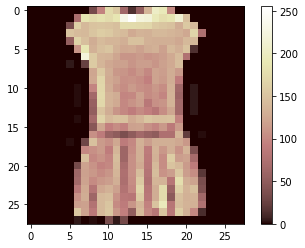

In [5]:
# 우선 이미지로 살펴보자

import matplotlib.pyplot as plt 

plt.imshow(train_X[3], cmap = "pink")   # cmap : 색 설정
plt.colorbar()  # 밝기를 색으로 표현한다. (ex: 너무 어두우면 0, 밝으면 250)
plt.show()

In [7]:
# label

train_Y[3]
# 3

3

Y값은 label이며 fashion_MNIST의 label은 하단의 총 10개다.

<img alt = fashion_mnist_label src = img/fashion_mnist_label.png width = 300>

In [8]:
print(f"train_X[11].shape : {train_X[11].shape}")

train_X[11].shape : (28, 28)


In [9]:
print("train_X[11].ndim : ", train_X[11].ndim)      # ndim : n의 dimension, 즉 2차원 데이터다

train_X[11].ndim :  2


```python
# train_X[11]
```

잘 보면 숫자의 경계가 이미지의 윤곽과 같다.

<img alt="Matrix_of_train_X" src=img/fashion_mnist_train_X.png width = 800>

이전까지는 하나의 행 다수의 열로 하나를 예측했는데, 이미지 데이터는 다수의 행과 다수의 행으로 하나를 예측해야 된다. 다시말해, 구조적 차이가 생긴다.

해결을 위해 2차원을 1차원으로 변환한다. (펼친다는 의미의 flatten 함수를 사용)

<img alt="Matrix_of_train_X" src=img/fashion_mnist_dimensions.png width = 700>


In [13]:
train_X_flat = train_X[0].flatten()
print(f"train_X_flat.shape : {train_X_flat.shape}")     # 784 = 28 * 28
print(f"train_X_flat.ndim : {train_X_flat.ndim}")

train_X_flat.shape : (784,)
train_X_flat.ndim : 1


위 내용을 그림으로 바꾸면 아래와 같다.

### softmax
- *단순 회귀, 이미지를 처리하는 CNN 모델이 아니다.*

<img alt="Matrix_of_train_X" src=img/fashion_mnist_flatten.png width = 700>

- y 값이 10개이므로 bias도 10개 필요
- 연산한 값 (x1 ~ xn)을 모두 더한 후 분모로 내린 후 해당하는 값을 분자로 올려 값을 구한다. ?

- $e$ 자연상수
    - 사용하는 이유 : 변화값을 극명하게 나타내기 위함
    - 문제점
        1. **overflow** / 수가 너무 커져 연산할 수 없다.  
            ```python
            import numpy as np 

            print(np.exp(1))
            print(np.exp(10))
            print(np.exp(100))
            print(np.exp(1000)) 

            # 2.718281828459045
            # 22026.465794806718
            # 2.6881171418161356e+43
            # inf
            # <ipython-input-14-b4716efe606d>:6: RuntimeWarning: overflow encountered in exp
            # print(np.exp(1000))
            ```
            
            
        2. 결과값이 모두 음수일 경우 값이 모두 작아져 0에 수렴한다. 즉, 0으로 나눌 수 없게 되므로 **zero division error** 가 발생한다.
    - 이러한 문제 때문에 Softmax로 이미지를 처리할 수 없어진다. => CNN으로 이미지를 학습하고 연산하게 되었다.


### 사용되는 모델들
- 회귀 ANN
    - Artificial Neural Network
- 이미지 CNN
    - Convolution Neural Network
- 자연어 RNN
    - Recurrent Neural Network
- 생성 GAN
    - Generative Adversarial Network